# 2. Parámetros de ecuaciones de estado cúbicas (SRK, PR, RKPR)

En esta sección se presenta una implementación en Python para calcular los parámetros de ecuaciones de estado cúbicas (SRK, PR, RKPR). Las 2 primeras ecuaciónes de estado [SRK](http://www.sciencedirect.com/science/article/pii/0009250972800964) y [PR](http://pubs.acs.org/doi/abs/10.1021/i160057a011), son ecuaciones clásicas y ampliamente utilizadas por la industria y la academia que cuentan con 2 parámetros (parámetro de atracción $a_C$ y de repulsión $b$) para describir el comportamiento de sustancias. Por otro lado, la ecuación de estado [RKPR](http://www.sciencedirect.com/science/article/pii/S0378381205000828?via%3Dihub), la cual es una propuesta de una ecuación con un tercer parámetro $\delta_1$,el cual permite incluir el efecto estructural de la molécula de la sustancia a la que se quiere describir su comportamiento termodinámico.

## 2.1 Ecuaciones de estado: SRK y PR

Como se mncionó anteriormente en el caso de las ecuaciones de estado (SRK y PR) se tienen los parámetro de atracción $a_C$ y de repulsión $b$ que pueden ser calculados por medio de expresiones que relacionan constantes como temperatura crítica $T_c$, presión crítica $P_c$, volumen crítico $V_c$ y factor acéntrico $\omega$ de una sustancia pura ademas de la constate universal de los gases [R](https://en.wikipedia.org/wiki/Gas_constant).

## 2.1.1 Especificación de las constantes: $T_c$, $P_c$, $V_c$ y  $\omega$

En el caso de especificar las constantes $T_c$, $P_c$, $V_c$ y $\omega$, es simple calcular los parámetros $a_c$, $b$ y $m$ por medio de las siguientes ecuaciones:

| Parámetros Ecuación de estado SRK | Parámetros Ecuación de estado PR |
| ---------- | ---------- |
| $ a_c = 0.077796070 \frac{R^2 T_c^2} {P_c}$  | $ a_c = 0.45723553 \frac{R^2 T_c^2} {P_c} $  |
| $ b_c = 0.086640 \frac{ R T_c} {P_c}$ | $ b_c = 0.077796070 \frac{R T_c} {P_c} $   |
| $ m = 0.480 + 1.574 \omega - 0.175 \omega^2$ | $m = 0.37464 + 1.54226 \omega - 0.26992 \omega ^2$ |


## 2.1.2 Especificación de los parámetros: $a_c$, $b$ y  $m$


Ahora en el caso realizar una especificación para los valores de los parámetro de atracción $a_C$, de repulsión $b$ y $m$ para una sustancia pura, es simple obtener los valores correspondientes de las constantes $T_c$, $P_c$, $V_c$ y $\omega$ 


$$ T_c = \frac{\omega_b  a_c} {\omega_a R b} $$


$$ P_c = \frac{\omega_b R T_c} {b} $$

$$ V_c = \frac{Z_c R T_c} {P_c} $$

En el caso del $ \omega$, se debe resolver una ecuación cuadratica que depende de unos determinados valores de constantes $c$, del parámetro $\delta_1$ y el parámetro $m$, que toman determinados valores para casa ecuación de estado:

$$ \omega = 0.5 \frac{- c_2 + \sqrt{c_2^2 - 4 c_1 c_3}}{2c_1} $$

| Ecuación de estado SRK | Ecuación de estado PR |
| ---------- | ---------- |
| $\delta_1 = 1.0$   | $\delta_1 = 1.0 + \sqrt{2.0}$  |
| $c_1 = -0.175$  | $c_1 = -0.26992$   |
| $c_2 = 1.574$   | $c_2 = 1.54226$   |
| $c_3 = 0.48 - m$  | $c_3 = 0.37464 - m$   |



## 2.2 Ecuación de estado RKPR

En el caso de la ecuación de estado RKPR, se tiene una posibilidad adicional por medio de utilizar el parámetro estructural $\delta_1$ para correlacionar el valor del factor de compresibilidad $Z_c$ con el támaño de la molécula de la sustancia pura que se está tratando. De esta forma, a las especificaciones que se pueden hacer con las ecuaciones de estado (SRK y PR), como en el caso de especificar las constantes como temperatura crítica $T_c$, presión crítica $P_c$, volumen crítico $V_c$ y factor acéntrico $\omega$ de una sustancia pura, se tiene 3 posibles situaciones adicionales: 

1. La primera especificación corresponde a un valor del factor de compresibilidad crítico $Z_c$ y luego determinar el valor del parámetro $\delta_1$ que cumple con dicha especificación. Después se procede con el cálculo del parámetro $k$.

2. La segunda especificación corresponde a un valor del parámetro $\delta_1$ para el posterior cálculo del parámetro $k$.

3. La tercera opción es utilizar una correlación termodinámica para obtener un valor de la densidad de líquido saturado de una sustancia pura $\rho(T)_{sat}^{liq}$ y pasarlo como una especificación, para encontrar un valor de los parámetros $\delta_1$ y $k$, que cumplan con la imposición del valor de la densidad de líquido saturado.


<img src="img\rkpr_parameters_latex.png">

                Figura 1. Diagrama conceptual del calculo de parámetros ecuación RKPR

En la figura 1, los casos de Mode = 1, 2 y 3 corresponden a especificar las constantes ($T_c$, $P_c$, $\omega$) + alguna de las variables ($V_c$, $\delta_1$ , $\rho(T)_{sat}^{liq}$), mientras que el Mode = 4 se refiere a la especificación de los parámetros ($a_c$, $b$, $k$, $\delta_1$) y obtener el valor de las constantes ($T_c$, $P_c$, $V_c$, $\omega$). Este último cálculo se realiza de forma directa como en el caso de las ecuaciones (SRK  y PR), por tanto, la siguiente breve explicación se centra en las 3 primeras opciones.

## 2.2.1 Especificación del parametro $\delta_1 $

La primera especificación corresponde a dar un valor del parámetro $\delta_1$, con est valor se calcula el factor de compresiblidad $Z_c$ por mediod e las siguientes ecuaciones:

$$d_1 = (1 + \delta_1 ^2) / (1 + \delta_1)$$

$$y = 1 + (2 (1 + \delta_1) ^ \frac{1} {3} + \left (\frac{4} {1 + \delta_1} \right)^ \frac{1} {3}$$

$$ \omega_a = \frac{(3 y ^2 + 3 y d_1 + d_1 ^ 2 + d_1 - 1)} {(3 y + d_1 - 1) ^ 2} $$

$$ \omega_b = \frac{1} {3 y + d_1 - 1} $$

$$ Z_c = \frac{y} {3 y + d_1 - 1} $$


en $A_0$ 

factor de compresibilidad crítico $Z_c$, determinado por las constantes ($T_c$, $P_c$, $V_c$):

$$ Z_c =   \frac{P_c V_c}{R T_c}$$

para el posterior cálculo del parámetro $k$.



## 2.2.2 Especificación de las constantes: $T_c$, $P_c$, $V_c$ y $\omega$

La segunda especificación corresponde a un valor del factor de compresibilidad crítico $Z_c$, determinado por las constantes ($T_c$, $P_c$, $V_c$):

$$ Z_c =   \frac{P_c V_c}{R T_c}$$

que para luego determinar el correspondiente valor del parámetro d1 que cumple con dicha especificación. Después se procede con el cálculo del parámetro k.

## 2.2.3 Especificación de un valor de densidad de líqudo saturado $\rho(T)_{sat}^{liq}$

La tercera opción es la especificación de un valor para la densidad de líquido saturado a una temperatura. En este caso se debe encontrar un valor d1 y el correspondiente valor del parámetro k, que permita cumplir con la imposición del valor de la densidad de líquido saturado. En este caso, se puede utilizar la clase Thermodynamic_correlations() para obtener un valor para la densidad de líquido saturado de una sustancia pura a una determinada temperatura y luego pasar este valor, como una especificación en la obtención de los parámetros de la ecuación RKPR.

En la figura 4 se muestran como variables de entrada las constantes Tc,Pc, w y alfa que puede ser una especificación de alguno de los 3 parámetros siguientes $(\delta_1, V_c, \rho(T)_{sat}^{liq})$.

La función F1 corresponde a la estimación de un valor para el parámetro {d1} de acuerdo a una correlación preestablecida en el caso de {alfa = Vc}.

La función F2 es el cálculo de los parámetros {ac} y {b} para el correspondiente valor del parámetro {d1}. En el caso de especificar el parámetro {alfa=d1}, el cálculo de los parámetros Zc, ac y b son directos y no requieren de iteración. Mientras que en el caso de alfa = {Vc} se requiere encontrar de forma iterativa el valor del parámetro d1 que verifique el valor de Zc correspondiente por medio del Vc previamente especificado. De manera similar se procede en el caso de {alfa = rho(T)_sat_liq}.

## 2.2.4 Especificación de los parámetros: $a_c, b, k, \delta_1$

En los ejemplos siguientes se utilizan los datos termodísicos de la base de datos DPPR. Para el caso se tiene como especificación la ecuación de estado RKPR y las constantes criticas para el componente 3-METHYLHEPTANE.

2.3

In [2]:
import numpy as np
import pandas as pd
import pyther as pt

importar las linrerías requeridas, en este caso se trata de las librerías numpy, pandas junto con pyther

In [3]:
properties_data = pt.Data_parse()

component = "3-METHYLHEPTANE"
component = "METHANE"
component = "ETHANE"
component = "PROPANE"
component = "n-HEXATRIACONTANE"

NMODEL = "RKPR"
NMODEL = "PR"
ICALC = "constants_eps"

properties_component = properties_data.selec_component(component)
pt.print_properties_component(component, properties_component)
dinputs = np.array([properties_component[1]['Tc'], properties_component[1]['Pc'],
                    properties_component[1]['Omega'], properties_component[1]['Vc']])

component_eos = pt.models_eos_cal(NMODEL, ICALC, dinputs)

#ac = component_eos[0]
print(component_eos)




Component = n-HEXATRIACONTANE
Acentric_factor = 1.526
Critical_Temperature = 874.0 K
Critical_Pressure = 6.711 Bar
Critical_Volume = 2.09 cm3/mol
Compressibility_factor_Z = 0.196


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
[359.78656827704333, 0.84239649103360315, 2.0995725340799996, 2.4142135623730949]


In [8]:
components = ["ISOBUTANE", "CARBON DIOXIDE", 'METHANE', "ETHANE", "3-METHYLHEPTANE", "n-PENTACOSANE",
              "NAPHTHALENE", "m-ETHYLTOLUENE", "2-METHYL-1-HEXENE"]


NMODEL = "PR"
ICALC = "constants_eps"
component_eos_list = np.zeros((len(components),4))

for index, component in enumerate(components):
    
    properties_component = properties_data.selec_component(component)
    #pt.print_properties_component(component, properties_component)
    dinputs = np.array([properties_component[1]['Tc'], properties_component[1]['Pc'],
                        properties_component[1]['Omega'], properties_component[1]['Vc']])
    
    component_eos = pt.models_eos_cal(NMODEL, ICALC, dinputs)
    component_eos_list[index] = component_eos 
    
#components_table_PR = pd.DataFrame(component_eos_list, index=components, columns=['ac', 'b', 'rm', 'del1'])
#print(components_table_PR)

The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]


In [9]:
components_table_PR = pd.DataFrame(component_eos_list, index=components, columns=['ac', 'b', 'rm', 'del1'])
print(components_table_PR)

components_table_PR

                           ac         b        rm      del1
ISOBUTANE           14.624767  0.073327  0.644657  2.414214
CARBON DIOXIDE       4.014554  0.027005  0.705994  2.414214
METHANE              2.528951  0.027157  0.392340  2.414214
ETHANE               6.128134  0.041073  0.525423  2.414214
3-METHYLHEPTANE     39.968562  0.145103  0.910740  2.414214
n-PENTACOSANE      222.281736  0.560184  1.749542  2.414214
NAPHTHALENE         44.276783  0.121075  0.816061  2.414214
m-ETHYLTOLUENE      45.780981  0.147037  0.844082  2.414214
2-METHYL-1-HEXENE   32.300106  0.122858  0.825976  2.414214


,ac,b,rm,del1
ISOBUTANE,14.624767,0.073327,0.644657,2.414214
CARBON DIOXIDE,4.014554,0.027005,0.705994,2.414214
METHANE,2.528951,0.027157,0.392340,2.414214
ETHANE,6.128134,0.041073,0.525423,2.414214
3-METHYLHEPTANE,39.968562,0.145103,0.910740,2.414214
n-PENTACOSANE,222.281736,0.560184,1.749542,2.414214
NAPHTHALENE,44.276783,0.121075,0.816061,2.414214
m-ETHYLTOLUENE,45.780981,0.147037,0.844082,2.414214
2-METHYL-1-HEXENE,32.300106,0.122858,0.825976,2.414214


In [10]:
name = properties_data.read_dppr()

%timeit name[~name.index.duplicated(keep='first')]
name


1000 loops, best of 3: 420 µs per loop


,Omega,Tc,Pc,Vc,Zc,Tm,Tb,Ttr,Ptr,Vliq,SolPar
Name,,,,,,,,,,,
METHANE,0.0115,190.564,45.389,0.0986,0.2860,90.694,111.660,90.694,1.154310e-01,0.037969,11.6000
ETHANE,0.0995,305.320,48.083,0.1455,0.2790,90.352,184.550,90.352,1.115220e-05,0.055229,12.4000
PROPANE,0.1523,369.830,41.924,0.2000,0.2760,85.470,231.110,85.470,1.662970e-09,0.075700,13.1000
n-BUTANE,0.2002,425.120,37.464,0.2550,0.2740,134.860,272.650,134.860,6.647720e-06,0.096483,13.7000
n-PENTANE,0.2515,469.700,33.259,0.3130,0.2700,143.420,309.220,143.420,6.774420e-07,0.116045,14.4000
n-HEXANE,0.3013,507.600,29.854,0.3710,0.2660,177.830,341.880,177.830,8.899040e-06,0.131362,14.9000
n-HEPTANE,0.3495,540.200,27.042,0.4280,0.2610,182.570,371.580,182.570,1.803050e-06,0.147024,15.2000
n-OCTANE,0.3996,568.700,24.574,0.4860,0.2560,216.380,398.830,216.380,2.080730e-05,0.163374,15.4000
n-NONANE,0.4435,594.600,22.601,0.5440,0.2520,219.660,423.970,219.660,4.249520e-06,0.179559,15.6000


In [11]:
np.shape(name)

(1150, 11)

In [12]:
name.ix["NITROGEN TRIFLUORIDE"]

/home/andres-python/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


Omega       0.125500
Tc        233.850000
Pc         44.707000
Vc          0.118700
Zc          0.277000
Tm         66.360000
Tb        144.090000
Ttr        66.360000
Ptr         0.000003
Vliq        0.235000
SolPar     14.996000
Name: NITROGEN TRIFLUORIDE, dtype: float64

In [13]:
name.index

Index(['METHANE', 'ETHANE', 'PROPANE', 'n-BUTANE', 'n-PENTANE', 'n-HEXANE',
       'n-HEPTANE', 'n-OCTANE', 'n-NONANE', 'n-DECANE',
       ...
       'DISILANE', 'TRIMETHYLALUMINUM', 'TRIMETHYLGALLIUM',
       'CHLOROSULFONIC ACID', 'PERCHLORIC ACID', 'NITRIC ACID', 'WATER',
       'HYDROGEN PEROXIDE', 'MAGNESIUM OXIDE', 'PHOSPHORUS PENTOXIDE'],
      dtype='object', name='Name', length=1150)

In [14]:
name.index[-2:]

Index(['MAGNESIUM OXIDE', 'PHOSPHORUS PENTOXIDE'], dtype='object', name='Name')

In [15]:
type(list(name.index))

list

In [16]:
name_componets = list(name.index)
name_componets

['METHANE',
 'ETHANE',
 'PROPANE',
 'n-BUTANE',
 'n-PENTANE',
 'n-HEXANE',
 'n-HEPTANE',
 'n-OCTANE',
 'n-NONANE',
 'n-DECANE',
 'n-UNDECANE',
 'n-DODECANE',
 'n-TRIDECANE',
 'n-TETRADECANE',
 'n-PENTADECANE',
 'n-HEXADECANE',
 'n-HEPTADECANE',
 'n-OCTADECANE',
 'n-NONADECANE',
 'n-EICOSANE',
 'n-HENEICOSANE',
 'n-DOCOSANE',
 'n-TRICOSANE',
 'n-TETRACOSANE',
 'n-PENTACOSANE',
 'n-HEXACOSANE',
 'n-OCTACOSANE',
 'n-TRIACONTANE',
 'n-DOTRIACONTANE',
 'n-HEXATRIACONTANE',
 'ISOBUTANE',
 'ISOPENTANE',
 '2-METHYLPENTANE',
 '3-METHYLPENTANE',
 '2-METHYLHEXANE',
 '3-METHYLHEXANE',
 '2-METHYLHEPTANE',
 '3-METHYLHEPTANE',
 '4-METHYLHEPTANE',
 '2-METHYLOCTANE',
 '3-METHYLOCTANE',
 '4-METHYLOCTANE',
 '2-METHYLNONANE',
 '3-METHYLNONANE',
 '4-METHYLNONANE',
 '5-METHYLNONANE',
 'NEOPENTANE',
 '2,2-DIMETHYLBUTANE',
 '2,3-DIMETHYLBUTANE',
 '2,2-DIMETHYLPENTANE',
 '2,3-DIMETHYLPENTANE',
 '2,4-DIMETHYLPENTANE',
 '3,3-DIMETHYLPENTANE',
 '2,2-DIMETHYLHEXANE',
 '2,3-DIMETHYLHEXANE',
 '2,4-DIMETHYLHEXANE',
 

In [12]:
#components = ["ISOBUTANE", "CARBON DIOXIDE", 'METHANE', "ETHANE", "3-METHYLHEPTANE", "n-PENTACOSANE",
#              "NAPHTHALENE", "m-ETHYLTOLUENE", "2-METHYL-1-HEXENE"]

components = name_componets

NMODEL = "PR"
ICALC = "constants_eps"
component_eos_list = np.zeros((len(components),4))

for index, component in enumerate(components):
    
    properties_component = properties_data.selec_component(component)
    pt.print_properties_component(component, properties_component)
    dinputs = np.array([properties_component[1]['Tc'], properties_component[1]['Pc'],
                        properties_component[1]['Omega'], properties_component[1]['Vc']])
    
    component_eos = pt.models_eos_cal(NMODEL, ICALC, dinputs)
    component_eos_list[index] = component_eos 
    
#components_table_PR = pd.DataFrame(component_eos_list, index=components, columns=['ac', 'b', 'rm', 'del1'])
#print(components_table_PR)



Component = METHANE
Acentric_factor = 0.0115
Critical_Temperature = 190.564 K
Critical_Pressure = 45.389 Bar
Critical_Volume = 0.09860000000000001 cm3/mol
Compressibility_factor_Z = 0.28600000000000003


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = ETHANE
Acentric_factor = 0.0995
Critical_Temperature = 305.32 K
Critical_Pressure = 48.083 Bar
Critical_Volume = 0.14550000000000002 cm3/mol
Compressibility_factor_Z = 0.279


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = PROPANE
Acentric_factor = 0.15230000000000002
Critical_Temperature = 369.83 K
Critical_Pressure = 41.924 Bar
Critical_Volume = 0.2 cm3/mol
Compressibility_factor_Z = 0.276


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = n-BUTANE
Acentric_factor = 0.20020000000000002
Critical_Temperature = 425.12 K
Critical_Pressure = 37.464 Bar
Critical_Volume = 0.255 cm3/mol
Compressibility_factor

Component = ISOPENTANE
Acentric_factor = 0.2275
Critical_Temperature = 460.43 K
Critical_Pressure = 33.368 Bar
Critical_Volume = 0.3058 cm3/mol
Compressibility_factor_Z = 0.27


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 2-METHYLPENTANE
Acentric_factor = 0.27740000000000004
Critical_Temperature = 497.5 K
Critical_Pressure = 29.706 Bar
Critical_Volume = 0.3664 cm3/mol
Compressibility_factor_Z = 0.267


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 3-METHYLPENTANE
Acentric_factor = 0.2737
Critical_Temperature = 504.43 K
Critical_Pressure = 30.831 Bar
Critical_Volume = 0.3664 cm3/mol
Compressibility_factor_Z = 0.273


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 2-METHYLHEXANE
Acentric_factor = 0.3277
Critical_Temperature = 530.37 K
Critical_Pressure = 26.982 Bar
Critical_Volume = 0.421 cm3/mol
Compressibility_factor_Z = 0.261


The NMODEL is 

Component = 2,3-DIMETHYLOCTANE
Acentric_factor = 0.43270000000000003
Critical_Temperature = 613.0 K
Critical_Pressure = 21.811 Bar
Critical_Volume = 0.5750000000000001 cm3/mol
Compressibility_factor_Z = 0.249


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 2,4-DIMETHYLOCTANE
Acentric_factor = 0.4345
Critical_Temperature = 600.0 K
Critical_Pressure = 21.416 Bar
Critical_Volume = 0.5750000000000001 cm3/mol
Compressibility_factor_Z = 0.25


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 2,5-DIMETHYLOCTANE
Acentric_factor = 0.4403
Critical_Temperature = 603.0 K
Critical_Pressure = 21.416 Bar
Critical_Volume = 0.5750000000000001 cm3/mol
Compressibility_factor_Z = 0.249


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 2,6-DIMETHYLOCTANE
Acentric_factor = 0.43860000000000005
Critical_Temperature = 606.0 K
Critical_Pressure = 21.416 Bar
Critical_Volume =

Component = CYCLOOCTANE
Acentric_factor = 0.2904
Critical_Temperature = 640.0 K
Critical_Pressure = 34.345 Bar
Critical_Volume = 0.396 cm3/mol
Compressibility_factor_Z = 0.259


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = METHYLCYCLOPENTANE
Acentric_factor = 0.23020000000000002
Critical_Temperature = 532.79 K
Critical_Pressure = 37.355 Bar
Critical_Volume = 0.319 cm3/mol
Compressibility_factor_Z = 0.273


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 1,1-DIMETHYLCYCLOPENTANE
Acentric_factor = 0.27240000000000003
Critical_Temperature = 547.0 K
Critical_Pressure = 33.999 Bar
Critical_Volume = 0.36 cm3/mol
Compressibility_factor_Z = 0.273


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = cis-1,2-DIMETHYLCYCLOPENTANE
Acentric_factor = 0.2662
Critical_Temperature = 565.15 K
Critical_Pressure = 34.0 Bar
Critical_Volume = 0.37 cm3/mol
Compressibility_

Component = 1-BUTENE
Acentric_factor = 0.1905
Critical_Temperature = 419.95 K
Critical_Pressure = 39.901 Bar
Critical_Volume = 0.2393 cm3/mol
Compressibility_factor_Z = 0.277


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 1-PENTENE
Acentric_factor = 0.2311
Critical_Temperature = 464.78 K
Critical_Pressure = 34.671 Bar
Critical_Volume = 0.295 cm3/mol
Compressibility_factor_Z = 0.268


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 1-HEXENE
Acentric_factor = 0.28040000000000004
Critical_Temperature = 504.03 K
Critical_Pressure = 30.989 Bar
Critical_Volume = 0.354 cm3/mol
Compressibility_factor_Z = 0.265


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 1-HEPTENE
Acentric_factor = 0.331
Critical_Temperature = 537.29 K
Critical_Pressure = 27.93 Bar
Critical_Volume = 0.41300000000000003 cm3/mol
Compressibility_factor_Z = 0.262


The NMODEL is eos_PR a

Component = cis-4-OCTENE
Acentric_factor = 0.3854
Critical_Temperature = 568.0 K
Critical_Pressure = 25.561 Bar
Critical_Volume = 0.461 cm3/mol
Compressibility_factor_Z = 0.253


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = trans-2-OCTENE
Acentric_factor = 0.33840000000000003
Critical_Temperature = 577.0 K
Critical_Pressure = 25.463 Bar
Critical_Volume = 0.484 cm3/mol
Compressibility_factor_Z = 0.26


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = trans-3-OCTENE
Acentric_factor = 0.3438
Critical_Temperature = 574.0 K
Critical_Pressure = 25.463 Bar
Critical_Volume = 0.48 cm3/mol
Compressibility_factor_Z = 0.26


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = trans-4-OCTENE
Acentric_factor = 0.3393
Critical_Temperature = 573.0 K
Critical_Pressure = 25.463 Bar
Critical_Volume = 0.48 cm3/mol
Compressibility_factor_Z = 0.26


The NMODEL is eos_PR and

Component = CYCLOPENTENE
Acentric_factor = 0.19590000000000002
Critical_Temperature = 507.0 K
Critical_Pressure = 47.392 Bar
Critical_Volume = 0.245 cm3/mol
Compressibility_factor_Z = 0.279


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = CYCLOHEXENE
Acentric_factor = 0.21230000000000002
Critical_Temperature = 560.4 K
Critical_Pressure = 42.931 Bar
Critical_Volume = 0.291 cm3/mol
Compressibility_factor_Z = 0.272


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 1-METHYLCYCLOPENTENE
Acentric_factor = 0.2318
Critical_Temperature = 542.0 K
Critical_Pressure = 40.76 Bar
Critical_Volume = 0.303 cm3/mol
Compressibility_factor_Z = 0.278


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 3-METHYLCYCLOPENTENE
Acentric_factor = 0.2296
Critical_Temperature = 526.0 K
Critical_Pressure = 40.76 Bar
Critical_Volume = 0.303 cm3/mol
Compressibility_factor_Z = 0.28600

Component = ACETYLENE
Acentric_factor = 0.18730000000000002
Critical_Temperature = 308.32 K
Critical_Pressure = 60.587 Bar
Critical_Volume = 0.113 cm3/mol
Compressibility_factor_Z = 0.271


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = METHYLACETYLENE
Acentric_factor = 0.21610000000000001
Critical_Temperature = 402.39 K
Critical_Pressure = 55.544 Bar
Critical_Volume = 0.164 cm3/mol
Compressibility_factor_Z = 0.276


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = VINYLACETYLENE
Acentric_factor = 0.10690000000000001
Critical_Temperature = 454.0 K
Critical_Pressure = 47.964 Bar
Critical_Volume = 0.20500000000000002 cm3/mol
Compressibility_factor_Z = 0.264


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = DIMETHYLACETYLENE
Acentric_factor = 0.23850000000000002
Critical_Temperature = 473.2 K
Critical_Pressure = 48.063 Bar
Critical_Volume = 0.221 cm3/mo

Component = n-PENTADECYLBENZENE
Acentric_factor = 0.8567
Critical_Temperature = 809.0 K
Critical_Pressure = 13.126 Bar
Critical_Volume = 1.09 cm3/mol
Compressibility_factor_Z = 0.216


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = n-HEXADECYLBENZENE
Acentric_factor = 0.8996000000000001
Critical_Temperature = 818.0 K
Critical_Pressure = 12.534 Bar
Critical_Volume = 1.1400000000000001 cm3/mol
Compressibility_factor_Z = 0.213


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = n-HEPTADECYLBENZENE
Acentric_factor = 0.9195000000000001
Critical_Temperature = 826.0 K
Critical_Pressure = 11.942 Bar
Critical_Volume = 1.2 cm3/mol
Compressibility_factor_Z = 0.211


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = n-OCTADECYLBENZENE
Acentric_factor = 0.9505
Critical_Temperature = 834.0 K
Critical_Pressure = 11.448 Bar
Critical_Volume = 1.25 cm3/mol
Compressibilit

Component = 1-METHYL-4-n-PROPYLBENZENE
Acentric_factor = 0.41340000000000005
Critical_Temperature = 656.0 K
Critical_Pressure = 27.733 Bar
Critical_Volume = 0.482 cm3/mol
Compressibility_factor_Z = 0.248


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 1,2,3,4-TETRAMETHYLBENZENE
Acentric_factor = 0.4172
Critical_Temperature = 693.0 K
Critical_Pressure = 30.693 Bar
Critical_Volume = 0.47500000000000003 cm3/mol
Compressibility_factor_Z = 0.256


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 1,2,3,5-TETRAMETHYLBENZENE
Acentric_factor = 0.4242
Critical_Temperature = 679.0 K
Critical_Pressure = 29.312 Bar
Critical_Volume = 0.482 cm3/mol
Compressibility_factor_Z = 0.254


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 1,2,4,5-TETRAMETHYLBENZENE
Acentric_factor = 0.43410000000000004
Critical_Temperature = 675.15 K
Critical_Pressure = 29.016 Bar
Critical

Component = 2-ETHYLNAPHTHALENE
Acentric_factor = 0.4213
Critical_Temperature = 771.0 K
Critical_Pressure = 31.285 Bar
Critical_Volume = 0.52 cm3/mol
Compressibility_factor_Z = 0.257


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 1-n-PROPYLNAPHTHALENE
Acentric_factor = 0.4554
Critical_Temperature = 782.0 K
Critical_Pressure = 29.312 Bar
Critical_Volume = 0.52 cm3/mol
Compressibility_factor_Z = 0.23800000000000002


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 1-n-BUTYLNAPHTHALENE
Acentric_factor = 0.49510000000000004
Critical_Temperature = 792.0 K
Critical_Pressure = 26.45 Bar
Critical_Volume = 0.631 cm3/mol
Compressibility_factor_Z = 0.257


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 1-PHENYLNAPHTHALENE
Acentric_factor = 0.5309
Critical_Temperature = 849.0 K
Critical_Pressure = 25.956 Bar
Critical_Volume = 0.656 cm3/mol
Compressibility_fac

Component = TETRAPHENYLMETHANE
Acentric_factor = 0.6794
Critical_Temperature = 983.0 K
Critical_Pressure = 17.666 Bar
Critical_Volume = 0.966 cm3/mol
Compressibility_factor_Z = 0.212


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = TETRAPHENYLETHYLENE
Acentric_factor = 0.7285
Critical_Temperature = 996.0 K
Critical_Pressure = 16.876 Bar
Critical_Volume = 1.02 cm3/mol
Compressibility_factor_Z = 0.211


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 1,1,2,2-TETRAPHENYLETHANE
Acentric_factor = 0.7322000000000001
Critical_Temperature = 827.0 K
Critical_Pressure = 16.482 Bar
Critical_Volume = 1.022 cm3/mol
Compressibility_factor_Z = 0.248


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = d-LIMONENE
Acentric_factor = 0.3123
Critical_Temperature = 660.0 K
Critical_Pressure = 27.14 Bar
Critical_Volume = 0.524 cm3/mol
Compressibility_factor_Z = 0.263


The 

Component = PHOSPHINE
Acentric_factor = 0.0357
Critical_Temperature = 324.75 K
Critical_Pressure = 64.5 Bar
Critical_Volume = 0.11330000000000001 cm3/mol
Compressibility_factor_Z = 0.274


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = HYDRAZINE
Acentric_factor = 0.3143
Critical_Temperature = 653.15 K
Critical_Pressure = 145.078 Bar
Critical_Volume = 0.158 cm3/mol
Compressibility_factor_Z = 0.428


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = NITRIC OXIDE
Acentric_factor = 0.5829
Critical_Temperature = 180.15 K
Critical_Pressure = 63.953 Bar
Critical_Volume = 0.058 cm3/mol
Compressibility_factor_Z = 0.251


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = NITROUS OXIDE
Acentric_factor = 0.1409
Critical_Temperature = 309.57 K
Critical_Pressure = 71.503 Bar
Critical_Volume = 0.0974 cm3/mol
Compressibility_factor_Z = 0.274


The NMODEL is eos_PR and 

Component = ACETONE
Acentric_factor = 0.3065
Critical_Temperature = 508.2 K
Critical_Pressure = 46.395 Bar
Critical_Volume = 0.209 cm3/mol
Compressibility_factor_Z = 0.233


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = DIKETENE
Acentric_factor = 0.3821
Critical_Temperature = 616.0 K
Critical_Pressure = 58.821 Bar
Critical_Volume = 0.234 cm3/mol
Compressibility_factor_Z = 0.272


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = METHYL ETHYL KETONE
Acentric_factor = 0.3234
Critical_Temperature = 535.5 K
Critical_Pressure = 40.957 Bar
Critical_Volume = 0.267 cm3/mol
Compressibility_factor_Z = 0.249


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = CYCLOPENTANONE
Acentric_factor = 0.28250000000000003
Critical_Temperature = 634.56 K
Critical_Pressure = 52.603 Bar
Critical_Volume = 0.258 cm3/mol
Compressibility_factor_Z = 0.261


The NMODEL is eos_PR and

Component = BENZOPHENONE
Acentric_factor = 0.545
Critical_Temperature = 816.0 K
Critical_Pressure = 29.706 Bar
Critical_Volume = 0.542 cm3/mol
Compressibility_factor_Z = 0.24


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = ANTHRAQUINONE
Acentric_factor = 0.6807000000000001
Critical_Temperature = 900.0 K
Critical_Pressure = 31.088 Bar
Critical_Volume = 0.58 cm3/mol
Compressibility_factor_Z = 0.244


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = METHANOL
Acentric_factor = 0.5640000000000001
Critical_Temperature = 512.64 K
Critical_Pressure = 79.911 Bar
Critical_Volume = 0.11800000000000001 cm3/mol
Compressibility_factor_Z = 0.224


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = ETHANOL
Acentric_factor = 0.6452
Critical_Temperature = 513.92 K
Critical_Pressure = 60.676 Bar
Critical_Volume = 0.167 cm3/mol
Compressibility_factor_Z = 0.24


The NMODEL

Component = 3-METHYL-1-BUTANOL
Acentric_factor = 0.589
Critical_Temperature = 577.2 K
Critical_Pressure = 38.786 Bar
Critical_Volume = 0.327 cm3/mol
Compressibility_factor_Z = 0.268


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 3-METHYL-2-BUTANOL
Acentric_factor = 0.35100000000000003
Critical_Temperature = 574.0 K
Critical_Pressure = 39.082 Bar
Critical_Volume = 0.327 cm3/mol
Compressibility_factor_Z = 0.271


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 2-PENTANOL
Acentric_factor = 0.5625
Critical_Temperature = 560.4 K
Critical_Pressure = 36.615 Bar
Critical_Volume = 0.327 cm3/mol
Compressibility_factor_Z = 0.26


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 3-PENTANOL
Acentric_factor = 0.6748000000000001
Critical_Temperature = 547.0 K
Critical_Pressure = 38.293 Bar
Critical_Volume = 0.327 cm3/mol
Compressibility_factor_Z = 0.279


The NMO

Component = alpha-METHYLBENZYL ALCOHOL
Acentric_factor = 0.706
Critical_Temperature = 668.0 K
Critical_Pressure = 39.378 Bar
Critical_Volume = 0.387 cm3/mol
Compressibility_factor_Z = 0.278


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 2-PHENYLETHANOL
Acentric_factor = 0.7429
Critical_Temperature = 684.0 K
Critical_Pressure = 38.687 Bar
Critical_Volume = 0.387 cm3/mol
Compressibility_factor_Z = 0.267


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 2,3-XYLENOL
Acentric_factor = 0.511
Critical_Temperature = 722.95 K
Critical_Pressure = 48.359 Bar
Critical_Volume = 0.36 cm3/mol
Compressibility_factor_Z = 0.293


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 2,4-XYLENOL
Acentric_factor = 0.5133
Critical_Temperature = 707.65 K
Critical_Pressure = 43.425 Bar
Critical_Volume = 0.39 cm3/mol
Compressibility_factor_Z = 0.292


The NMODEL is eos_PR and 

Component = NEOPENTYL GLYCOL
Acentric_factor = 1.1431
Critical_Temperature = 643.0 K
Critical_Pressure = 41.846 Bar
Critical_Volume = 0.34500000000000003 cm3/mol
Compressibility_factor_Z = 0.274


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 1,5-PENTANEDIOL
Acentric_factor = 1.2216
Critical_Temperature = 673.0 K
Critical_Pressure = 40.957 Bar
Critical_Volume = 0.34500000000000003 cm3/mol
Compressibility_factor_Z = 0.256


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 2,4-PENTANEDIOL
Acentric_factor = 1.1223
Critical_Temperature = 629.0 K
Critical_Pressure = 42.734 Bar
Critical_Volume = 0.325 cm3/mol
Compressibility_factor_Z = 0.269


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = PENTAERYTHRITOL
Acentric_factor = 2.1728
Critical_Temperature = 780.0 K
Critical_Pressure = 47.175 Bar
Critical_Volume = 0.381 cm3/mol
Compressibility_factor_Z = 0.281

Component = n-TRIDECANOIC ACID
Acentric_factor = 0.9039
Critical_Temperature = 754.0 K
Critical_Pressure = 17.863 Bar
Critical_Volume = 0.758 cm3/mol
Compressibility_factor_Z = 0.219


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = n-TETRADECANOIC ACID
Acentric_factor = 0.9356000000000001
Critical_Temperature = 765.0 K
Critical_Pressure = 16.778 Bar
Critical_Volume = 0.811 cm3/mol
Compressibility_factor_Z = 0.217


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = PENTADECANOIC ACID
Acentric_factor = 0.9586
Critical_Temperature = 775.0 K
Critical_Pressure = 15.791 Bar
Critical_Volume = 0.864 cm3/mol
Compressibility_factor_Z = 0.215


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = n-HEXADECANOIC ACID
Acentric_factor = 0.9827
Critical_Temperature = 785.0 K
Critical_Pressure = 14.903 Bar
Critical_Volume = 0.917 cm3/mol
Compressibility_factor_Z = 0.212



Component = ADIPIC ACID
Acentric_factor = 1.0507
Critical_Temperature = 809.0 K
Critical_Pressure = 34.838 Bar
Critical_Volume = 0.4 cm3/mol
Compressibility_factor_Z = 0.21


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = PIMELIC ACID
Acentric_factor = 1.1158
Critical_Temperature = 805.0 K
Critical_Pressure = 30.989 Bar
Critical_Volume = 0.46900000000000003 cm3/mol
Compressibility_factor_Z = 0.22


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 1,4-CYCLOHEXANEDICARBOXYLIC ACID
Acentric_factor = 1.0362
Critical_Temperature = 889.0 K
Critical_Pressure = 33.753 Bar
Critical_Volume = 0.464 cm3/mol
Compressibility_factor_Z = 0.215


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = SUBERIC ACID
Acentric_factor = 1.1471
Critical_Temperature = 809.0 K
Critical_Pressure = 27.831 Bar
Critical_Volume = 0.522 cm3/mol
Compressibility_factor_Z = 0.219


The NMODE

Component = CYCLOHEXYL FORMATE
Acentric_factor = 0.3679
Critical_Temperature = 645.0 K
Critical_Pressure = 34.74 Bar
Critical_Volume = 0.384 cm3/mol
Compressibility_factor_Z = 0.252


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = n-HEXYL FORMATE
Acentric_factor = 0.483
Critical_Temperature = 607.0 K
Critical_Pressure = 27.634 Bar
Critical_Volume = 0.437 cm3/mol
Compressibility_factor_Z = 0.242


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = n-HEPTYL FORMATE
Acentric_factor = 0.5337000000000001
Critical_Temperature = 628.0 K
Critical_Pressure = 25.068 Bar
Critical_Volume = 0.489 cm3/mol
Compressibility_factor_Z = 0.23800000000000002


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = n-OCTYL FORMATE
Acentric_factor = 0.5871000000000001
Critical_Temperature = 645.0 K
Critical_Pressure = 22.995 Bar
Critical_Volume = 0.547 cm3/mol
Compressibility_facto

Component = ETHYL PROPIONATE
Acentric_factor = 0.39440000000000003
Critical_Temperature = 546.0 K
Critical_Pressure = 33.18 Bar
Critical_Volume = 0.34500000000000003 cm3/mol
Compressibility_factor_Z = 0.256


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = beta-PROPIOLACTONE
Acentric_factor = 0.3577
Critical_Temperature = 686.0 K
Critical_Pressure = 68.196 Bar
Critical_Volume = 0.20600000000000002 cm3/mol
Compressibility_factor_Z = 0.25


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = gamma-BUTYROLACTONE
Acentric_factor = 0.369
Critical_Temperature = 739.0 K
Critical_Pressure = 58.623 Bar
Critical_Volume = 0.265 cm3/mol
Compressibility_factor_Z = 0.256


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = gamma-VALEROLACTONE
Acentric_factor = 0.403
Critical_Temperature = 727.0 K
Critical_Pressure = 47.767 Bar
Critical_Volume = 0.279 cm3/mol
Compressibil

Component = TETRAETHYLENE GLYCOL DIMETHYL ETHER
Acentric_factor = 0.9652000000000001
Critical_Temperature = 705.0 K
Critical_Pressure = 19.146 Bar
Critical_Volume = 0.674 cm3/mol
Compressibility_factor_Z = 0.223


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = DIPHENYL ETHER
Acentric_factor = 0.4389
Critical_Temperature = 766.8 K
Critical_Pressure = 30.397 Bar
Critical_Volume = 0.503 cm3/mol
Compressibility_factor_Z = 0.243


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = DIETHYLENE GLYCOL DI-n-BUTYL ETHER
Acentric_factor = 0.8455
Critical_Temperature = 680.0 K
Critical_Pressure = 17.37 Bar
Critical_Volume = 0.803 cm3/mol
Compressibility_factor_Z = 0.25


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = DIBENZYL ETHER
Acentric_factor = 0.5908
Critical_Temperature = 777.0 K
Critical_Pressure = 25.265 Bar
Critical_Volume = 0.634 cm3/mol
Compressibilit

Component = METHYL CHLORIDE
Acentric_factor = 0.1531
Critical_Temperature = 416.25 K
Critical_Pressure = 65.926 Bar
Critical_Volume = 0.14300000000000002 cm3/mol
Compressibility_factor_Z = 0.276


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = TETRACHLOROETHYLENE
Acentric_factor = 0.21380000000000002
Critical_Temperature = 620.0 K
Critical_Pressure = 44.313 Bar
Critical_Volume = 0.248 cm3/mol
Compressibility_factor_Z = 0.216


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = HEXACHLOROETHANE
Acentric_factor = 0.2386
Critical_Temperature = 695.0 K
Critical_Pressure = 32.963 Bar
Critical_Volume = 0.41200000000000003 cm3/mol
Compressibility_factor_Z = 0.23800000000000002


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = TRICHLOROETHYLENE
Acentric_factor = 0.21660000000000001
Critical_Temperature = 571.0 K
Critical_Pressure = 48.458 Bar
Critical_Volume =

Component = 1,4-DICHLORO-trans-2-BUTENE
Acentric_factor = 0.33330000000000004
Critical_Temperature = 646.0 K
Critical_Pressure = 37.306 Bar
Critical_Volume = 0.33 cm3/mol
Compressibility_factor_Z = 0.232


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 3,4-DICHLORO-1-BUTENE
Acentric_factor = 0.3002
Critical_Temperature = 589.0 K
Critical_Pressure = 37.997 Bar
Critical_Volume = 0.33 cm3/mol
Compressibility_factor_Z = 0.259


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 1,2-DICHLOROBUTANE
Acentric_factor = 0.2988
Critical_Temperature = 600.0 K
Critical_Pressure = 36.319 Bar
Critical_Volume = 0.343 cm3/mol
Compressibility_factor_Z = 0.253


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 1,4-DICHLOROBUTANE
Acentric_factor = 0.3221
Critical_Temperature = 641.0 K
Critical_Pressure = 35.628 Bar
Critical_Volume = 0.343 cm3/mol
Compressibility_factor_Z =

Component = 1,1-DIBROMOETHANE
Acentric_factor = 0.125
Critical_Temperature = 628.0 K
Critical_Pressure = 59.511 Bar
Critical_Volume = 0.276 cm3/mol
Compressibility_factor_Z = 0.319


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 1,2-DIBROMOETHANE
Acentric_factor = 0.20670000000000002
Critical_Temperature = 650.15 K
Critical_Pressure = 54.053 Bar
Critical_Volume = 0.2616 cm3/mol
Compressibility_factor_Z = 0.265


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = BROMOETHANE
Acentric_factor = 0.2548
Critical_Temperature = 503.8 K
Critical_Pressure = 61.485 Bar
Critical_Volume = 0.215 cm3/mol
Compressibility_factor_Z = 0.32


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 1-BROMOPROPANE
Acentric_factor = 0.2848
Critical_Temperature = 544.0 K
Critical_Pressure = 53.195 Bar
Critical_Volume = 0.266 cm3/mol
Compressibility_factor_Z = 0.317


The NMODEL is 

Component = 1,2-DIFLUOROETHANE
Acentric_factor = 0.22240000000000001
Critical_Temperature = 445.0 K
Critical_Pressure = 42.832 Bar
Critical_Volume = 0.195 cm3/mol
Compressibility_factor_Z = 0.229


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = ETHYL  FLUORIDE
Acentric_factor = 0.22
Critical_Temperature = 375.31 K
Critical_Pressure = 49.622 Bar
Critical_Volume = 0.164 cm3/mol
Compressibility_factor_Z = 0.264


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = HEXAFLUOROPROPYLENE
Acentric_factor = 0.2046
Critical_Temperature = 368.0 K
Critical_Pressure = 28.621 Bar
Critical_Volume = 0.268 cm3/mol
Compressibility_factor_Z = 0.254


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = OCTAFLUOROPROPANE
Acentric_factor = 0.3267
Critical_Temperature = 345.05 K
Critical_Pressure = 26.45 Bar
Critical_Volume = 0.299 cm3/mol
Compressibility_factor_Z = 0.279


The N

Component = 2-CHLORO-1,1-DIFLUOROETHYLENE
Acentric_factor = 0.21910000000000002
Critical_Temperature = 400.55 K
Critical_Pressure = 44.0 Bar
Critical_Volume = 0.197 cm3/mol
Compressibility_factor_Z = 0.264


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 2-CHLORO-1,1,1,2-TETRAFLUOROETHANE
Acentric_factor = 0.2735
Critical_Temperature = 395.65 K
Critical_Pressure = 34.937 Bar
Critical_Volume = 0.246 cm3/mol
Compressibility_factor_Z = 0.265


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 1,1-DICHLORO-2,2,2-TRIFLUOROETHANE
Acentric_factor = 0.28250000000000003
Critical_Temperature = 456.86 K
Critical_Pressure = 36.176 Bar
Critical_Volume = 0.275 cm3/mol
Compressibility_factor_Z = 0.265


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 1,2-DICHLORO-1,1,2-TRIFLUOROETHANE
Acentric_factor = 0.241
Critical_Temperature = 461.6 K
Critical_Pressure = 35.628 

Component = DI-n-PROPYLAMINE
Acentric_factor = 0.44970000000000004
Critical_Temperature = 550.0 K
Critical_Pressure = 30.989 Bar
Critical_Volume = 0.402 cm3/mol
Compressibility_factor_Z = 0.276


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = TRIETHYLAMINE
Acentric_factor = 0.31620000000000004
Critical_Temperature = 535.15 K
Critical_Pressure = 30.002 Bar
Critical_Volume = 0.39 cm3/mol
Compressibility_factor_Z = 0.266


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = DI-n-BUTYLAMINE
Acentric_factor = 0.5296000000000001
Critical_Temperature = 602.3 K
Critical_Pressure = 25.364 Bar
Critical_Volume = 0.512 cm3/mol
Compressibility_factor_Z = 0.263


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = DIISOBUTYLAMINE
Acentric_factor = 0.4854
Critical_Temperature = 580.0 K
Critical_Pressure = 25.364 Bar
Critical_Volume = 0.524 cm3/mol
Compressibility_factor_Z

Component = QUINALDINE
Acentric_factor = 0.265
Critical_Temperature = 773.0 K
Critical_Pressure = 29.213 Bar
Critical_Volume = 0.49 cm3/mol
Compressibility_factor_Z = 0.226


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = N,N-DIETHYLANILINE
Acentric_factor = 0.4262
Critical_Temperature = 702.0 K
Critical_Pressure = 28.127 Bar
Critical_Volume = 0.556 cm3/mol
Compressibility_factor_Z = 0.272


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 2,6-DIETHYLANILINE
Acentric_factor = 0.9538000000000001
Critical_Temperature = 678.0 K
Critical_Pressure = 30.792 Bar
Critical_Volume = 0.495 cm3/mol
Compressibility_factor_Z = 0.274


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = DIBENZOPYRROLE
Acentric_factor = 0.4938
Critical_Temperature = 899.0 K
Critical_Pressure = 32.174 Bar
Critical_Volume = 0.482 cm3/mol
Compressibility_factor_Z = 0.21


The NMODEL is eos

Component = TRIETHYLENE TETRAMINE
Acentric_factor = 0.9735
Critical_Temperature = 718.0 K
Critical_Pressure = 31.285 Bar
Critical_Volume = 0.482 cm3/mol
Compressibility_factor_Z = 0.256


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = N-METHYLCYCLOHEXYLAMINE
Acentric_factor = 0.3855
Critical_Temperature = 622.0 K
Critical_Pressure = 34.444 Bar
Critical_Volume = 0.393 cm3/mol
Compressibility_factor_Z = 0.265


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = INDOLE
Acentric_factor = 0.3763
Critical_Temperature = 790.0 K
Critical_Pressure = 42.438 Bar
Critical_Volume = 0.35 cm3/mol
Compressibility_factor_Z = 0.28200000000000003


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = TETRAETHYLENEPENTAMINE
Acentric_factor = 1.2365
Critical_Temperature = 774.0 K
Critical_Pressure = 24.969 Bar
Critical_Volume = 0.636 cm3/mol
Compressibility_factor_Z = 0.25


Th

Component = HEXANENITRILE
Acentric_factor = 0.4743
Critical_Temperature = 622.05 K
Critical_Pressure = 28.818 Bar
Critical_Volume = 0.384 cm3/mol
Compressibility_factor_Z = 0.217


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = BENZONITRILE
Acentric_factor = 0.3524
Critical_Temperature = 699.35 K
Critical_Pressure = 41.6 Bar
Critical_Volume = 0.339 cm3/mol
Compressibility_factor_Z = 0.246


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = NITROMETHANE
Acentric_factor = 0.3477
Critical_Temperature = 588.15 K
Critical_Pressure = 62.3 Bar
Critical_Volume = 0.1734 cm3/mol
Compressibility_factor_Z = 0.224


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = TETRANITROMETHANE
Acentric_factor = 0.5155000000000001
Critical_Temperature = 540.0 K
Critical_Pressure = 17.172 Bar
Critical_Volume = 0.468 cm3/mol
Compressibility_factor_Z = 0.181


The NMODEL is eos_PR

Component = ETHYL MERCAPTAN
Acentric_factor = 0.18780000000000002
Critical_Temperature = 499.15 K
Critical_Pressure = 54.182 Bar
Critical_Volume = 0.20700000000000002 cm3/mol
Compressibility_factor_Z = 0.274


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 1,2-ETHANEDITHIOL
Acentric_factor = 0.257
Critical_Temperature = 663.0 K
Critical_Pressure = 52.899 Bar
Critical_Volume = 0.209 cm3/mol
Compressibility_factor_Z = 0.203


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = ISOPROPYL MERCAPTAN
Acentric_factor = 0.21380000000000002
Critical_Temperature = 517.0 K
Critical_Pressure = 46.879 Bar
Critical_Volume = 0.254 cm3/mol
Compressibility_factor_Z = 0.281


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = n-PROPYL MERCAPTAN
Acentric_factor = 0.2318
Critical_Temperature = 536.6 K
Critical_Pressure = 45.695 Bar
Critical_Volume = 0.254 cm3/mol
Compressibil

Component = 2-METHYLTHIOPHENE
Acentric_factor = 0.2389
Critical_Temperature = 609.0 K
Critical_Pressure = 48.458 Bar
Critical_Volume = 0.275 cm3/mol
Compressibility_factor_Z = 0.267


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 3-METHYLTHIOPHENE
Acentric_factor = 0.23970000000000002
Critical_Temperature = 613.0 K
Critical_Pressure = 48.458 Bar
Critical_Volume = 0.276 cm3/mol
Compressibility_factor_Z = 0.266


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = METHYL-n-BUTYL SULFIDE
Acentric_factor = 0.3229
Critical_Temperature = 593.0 K
Critical_Pressure = 34.246 Bar
Critical_Volume = 0.36 cm3/mol
Compressibility_factor_Z = 0.253


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = METHYL-t-BUTYL SULFIDE
Acentric_factor = 0.23340000000000002
Critical_Temperature = 570.0 K
Critical_Pressure = 34.937 Bar
Critical_Volume = 0.36 cm3/mol
Compressibility_fac

Component = AMINOACETONITRILE
Acentric_factor = 0.4657
Critical_Temperature = 638.0 K
Critical_Pressure = 53.689 Bar
Critical_Volume = 0.229 cm3/mol
Compressibility_factor_Z = 0.23500000000000001


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = HYDRACRYLONITRILE
Acentric_factor = 0.8265
Critical_Temperature = 690.0 K
Critical_Pressure = 48.261 Bar
Critical_Volume = 0.243 cm3/mol
Compressibility_factor_Z = 0.20700000000000002


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = LACTONITRILE
Acentric_factor = 0.7886000000000001
Critical_Temperature = 643.0 K
Critical_Pressure = 49.642 Bar
Critical_Volume = 0.243 cm3/mol
Compressibility_factor_Z = 0.229


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 3-METHOXYPROPIONITRILE
Acentric_factor = 0.4597
Critical_Temperature = 638.0 K
Critical_Pressure = 35.825 Bar
Critical_Volume = 0.324 cm3/mol
Compressibili

Component = o-NITROANISOLE
Acentric_factor = 0.5613
Critical_Temperature = 782.0 K
Critical_Pressure = 37.108 Bar
Critical_Volume = 0.422 cm3/mol
Compressibility_factor_Z = 0.244


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = ACETANILIDE
Acentric_factor = 0.5635
Critical_Temperature = 825.0 K
Critical_Pressure = 36.812 Bar
Critical_Volume = 0.43 cm3/mol
Compressibility_factor_Z = 0.234


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = ACETAMINOPHEN
Acentric_factor = 0.7997000000000001
Critical_Temperature = 736.0 K
Critical_Pressure = 42.043 Bar
Critical_Volume = 0.452 cm3/mol
Compressibility_factor_Z = 0.315


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = p-PHENETIDINE
Acentric_factor = 0.5351
Critical_Temperature = 754.0 K
Critical_Pressure = 35.233 Bar
Critical_Volume = 0.446 cm3/mol
Compressibility_factor_Z = 0.254


The NMODEL is eos_PR and

Component = IRON
Acentric_factor = -0.2984
Critical_Temperature = 9340.0 K
Critical_Pressure = 10017.268 Bar
Critical_Volume = 0.028 cm3/mol
Compressibility_factor_Z = 0.366


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = GERMANIUM
Acentric_factor = -0.07150000000000001
Critical_Temperature = 9803.0 K
Critical_Pressure = 6425.856 Bar
Critical_Volume = 0.045 cm3/mol
Compressibility_factor_Z = 0.359


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = HYDROGEN
Acentric_factor = -0.216
Critical_Temperature = 33.19 K
Critical_Pressure = 12.958 Bar
Critical_Volume = 0.0641 cm3/mol
Compressibility_factor_Z = 0.305


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = HELIUM-3
Acentric_factor = -0.47150000000000003
Critical_Temperature = 3.31 K
Critical_Pressure = 1.155 Bar
Critical_Volume = 0.07250000000000001 cm3/mol
Compressibility_factor_Z = 0.308


The NMOD

Component = TRICHLOROSILANE
Acentric_factor = 0.2031
Critical_Temperature = 479.0 K
Critical_Pressure = 41.155 Bar
Critical_Volume = 0.268 cm3/mol
Compressibility_factor_Z = 0.281


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = TETRACHLOROSILANE
Acentric_factor = 0.2318
Critical_Temperature = 507.0 K
Critical_Pressure = 35.431 Bar
Critical_Volume = 0.326 cm3/mol
Compressibility_factor_Z = 0.278


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = TETRAFLUOROSILANE
Acentric_factor = 0.38580000000000003
Critical_Temperature = 259.0 K
Critical_Pressure = 36.714 Bar
Critical_Volume = 0.202 cm3/mol
Compressibility_factor_Z = 0.34900000000000003


The NMODEL is eos_PR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = SILANE
Acentric_factor = 0.0965
Critical_Temperature = 269.7 K
Critical_Pressure = 47.8 Bar
Critical_Volume = 0.1327 cm3/mol
Compressibility_factor_Z = 0.28700000000

In [13]:
components_table_PR_all = pd.DataFrame(component_eos_list, index=components, columns=['ac', 'b', 'rm', 'del1'])
print(components_table_PR_all)

components_table_PR_all

                                        ac         b        rm      del1
METHANE                           2.528951  0.027157  0.392340  2.414214
ETHANE                            6.128134  0.041073  0.525423  2.414214
PROPANE                          10.312189  0.057060  0.603265  2.414214
n-BUTANE                         15.248188  0.073399  0.672582  2.414214
n-PENTANE                        20.967239  0.091349  0.745445  2.414214
n-HEXANE                         27.280355  0.109979  0.814819  2.414214
n-HEPTANE                        34.109839  0.129214  0.880689  2.414214
n-OCTANE                         41.600631  0.149692  0.947826  2.414214
n-NONANE                         49.446035  0.170173  1.005541  2.414214
n-DECANE                         57.916241  0.191869  1.068477  2.414214
n-UNDECANE                       67.064566  0.214771  1.116594  2.414214
n-DODECANE                       76.191481  0.236954  1.173921  2.414214
n-TRIDECANE                      86.862503  0.26333

,ac,b,rm,del1
METHANE,2.528951,0.027157,0.392340,2.414214
ETHANE,6.128134,0.041073,0.525423,2.414214
PROPANE,10.312189,0.057060,0.603265,2.414214
n-BUTANE,15.248188,0.073399,0.672582,2.414214
n-PENTANE,20.967239,0.091349,0.745445,2.414214
n-HEXANE,27.280355,0.109979,0.814819,2.414214
n-HEPTANE,34.109839,0.129214,0.880689,2.414214
n-OCTANE,41.600631,0.149692,0.947826,2.414214
n-NONANE,49.446035,0.170173,1.005541,2.414214
n-DECANE,57.916241,0.191869,1.068477,2.414214


In [16]:
writer = pd.ExcelWriter('components_table_PR_all.xlsx')
components_table_PR_all.to_excel(writer,'Sheet1')
writer.save()

In [17]:
writer

In [18]:
components_table_PR_all.to_excel('foo.xlsx', sheet_name='Sheet1')

In [19]:
components_table_PR_all.to_csv('datosAll.csv')

In [20]:
print(open('datosAll.csv').read())

,ac,b,rm,del1
METHANE,2.528951062492548,0.027157050568159646,0.39234029307999996,2.414213562373095
ETHANE,6.128134245965791,0.0410729647682302,0.52542259452,2.414213562373095
PROPANE,10.312189431620025,0.05706000173426174,0.6032653253232,2.414213562373095
n-BUTANE,15.248188387665353,0.07339893316824202,0.6725820476032,2.414213562373095
n-PENTANE,20.967239346781806,0.09134898546647106,0.74544534268,2.414213562373095
n-HEXANE,27.280355026897126,0.1099794238648431,0.8148191442352,2.414213562373095
n-HEPTANE,34.109839101923924,0.12921357032575062,0.88068907452,2.414213562373095
n-OCTANE,41.60063138947857,0.14969239248927058,0.9478262272128,2.414213562373095
n-NONANE,49.44603523698024,0.1701725884731181,1.00554113788,2.414213562373095
n-DECANE,57.916241069821154,0.1918694371562333,1.0684769784432,2.414213562373095
n-UNDECANE,67.06456631008193,0.21477083125978458,1.1165940911471999,2.414213562373095
n-DODECANE,76.19148088289337,0.23695373401901118,1.1739212637568,2.414213562373095
n-TRIDECAN

In [21]:
#Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('pandas_simple.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
components_table_PR_all.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [23]:
result = pd.concat([name, components_table_PR_all], axis=1, join_axes=[components_table_PR_all.index])
result

,Omega,Tc,Pc,Vc,Zc,Tm,Tb,Ttr,Ptr,Vliq,SolPar,ac,b,rm,del1
METHANE,0.0115,190.564,45.389,0.0986,0.2860,90.694,111.660,90.694,1.154310e-01,0.037969,11.6000,2.528951,0.027157,0.392340,2.414214
ETHANE,0.0995,305.320,48.083,0.1455,0.2790,90.352,184.550,90.352,1.115220e-05,0.055229,12.4000,6.128134,0.041073,0.525423,2.414214
PROPANE,0.1523,369.830,41.924,0.2000,0.2760,85.470,231.110,85.470,1.662970e-09,0.075700,13.1000,10.312189,0.057060,0.603265,2.414214
n-BUTANE,0.2002,425.120,37.464,0.2550,0.2740,134.860,272.650,134.860,6.647720e-06,0.096483,13.7000,15.248188,0.073399,0.672582,2.414214
n-PENTANE,0.2515,469.700,33.259,0.3130,0.2700,143.420,309.220,143.420,6.774420e-07,0.116045,14.4000,20.967239,0.091349,0.745445,2.414214
n-HEXANE,0.3013,507.600,29.854,0.3710,0.2660,177.830,341.880,177.830,8.899040e-06,0.131362,14.9000,27.280355,0.109979,0.814819,2.414214
n-HEPTANE,0.3495,540.200,27.042,0.4280,0.2610,182.570,371.580,182.570,1.803050e-06,0.147024,15.2000,34.109839,0.129214,0.880689,2.414214
n-OCTANE,0.3996,568.700,24.574,0.4860,0.2560,216.380,398.830,216.380,2.080730e-05,0.163374,15.4000,41.600631,0.149692,0.947826,2.414214
n-NONANE,0.4435,594.600,22.601,0.5440,0.2520,219.660,423.970,219.660,4.249520e-06,0.179559,15.6000,49.446035,0.170173,1.005541,2.414214
n-DECANE,0.4923,617.700,20.824,0.6000,0.2470,243.510,447.305,243.510,1.374750e-05,0.195827,15.7000,57.916241,0.191869,1.068477,2.414214


In [24]:
#Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('tabla_parametros_completa_PR.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
result.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [26]:
parametrosCompletosPR = pd.read_excel("tabla_parametros_completa_PR.xlsx")
parametrosCompletosPR

,Omega,Tc,Pc,Vc,Zc,Tm,Tb,Ttr,Ptr,Vliq,SolPar,ac,b,rm,del1
METHANE,0.0115,190.564,45.389,0.0986,0.2860,90.694,111.660,90.694,1.154310e-01,0.037969,11.6000,2.528951,0.027157,0.392340,2.414214
ETHANE,0.0995,305.320,48.083,0.1455,0.2790,90.352,184.550,90.352,1.115220e-05,0.055229,12.4000,6.128134,0.041073,0.525423,2.414214
PROPANE,0.1523,369.830,41.924,0.2000,0.2760,85.470,231.110,85.470,1.662970e-09,0.075700,13.1000,10.312189,0.057060,0.603265,2.414214
n-BUTANE,0.2002,425.120,37.464,0.2550,0.2740,134.860,272.650,134.860,6.647720e-06,0.096483,13.7000,15.248188,0.073399,0.672582,2.414214
n-PENTANE,0.2515,469.700,33.259,0.3130,0.2700,143.420,309.220,143.420,6.774420e-07,0.116045,14.4000,20.967239,0.091349,0.745445,2.414214
n-HEXANE,0.3013,507.600,29.854,0.3710,0.2660,177.830,341.880,177.830,8.899040e-06,0.131362,14.9000,27.280355,0.109979,0.814819,2.414214
n-HEPTANE,0.3495,540.200,27.042,0.4280,0.2610,182.570,371.580,182.570,1.803050e-06,0.147024,15.2000,34.109839,0.129214,0.880689,2.414214
n-OCTANE,0.3996,568.700,24.574,0.4860,0.2560,216.380,398.830,216.380,2.080730e-05,0.163374,15.4000,41.600631,0.149692,0.947826,2.414214
n-NONANE,0.4435,594.600,22.601,0.5440,0.2520,219.660,423.970,219.660,4.249520e-06,0.179559,15.6000,49.446035,0.170173,1.005541,2.414214
n-DECANE,0.4923,617.700,20.824,0.6000,0.2470,243.510,447.305,243.510,1.374750e-05,0.195827,15.7000,57.916241,0.191869,1.068477,2.414214


In [27]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    parametrosCompletosPR[["Tc", "Pc"]], parametrosCompletosPR["ac"], 
    test_size=0.30, random_state=42
)

In [47]:
model = MLPRegressor(
    # ensayo 1
    max_iter=1000,
    # ensayo 2
    hidden_layer_sizes=(100,100,100),
    #learning_rate_init=0.0001,
)
model.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [48]:
print(X_test.iloc[250])
print(y_test.iloc[250])
print(model.predict([X_test.iloc[250]]))

Tc    624.000
Pc     39.674
Name: 1,1,1,2-TETRACHLOROETHANE, dtype: float64
31.0221940381
[ 62.17410461]


In [49]:
predict = model.predict(X_test)
print("Predict: %s" % list(predict[:5]))

Predict: [52.672563207497802, 68.860561796705838, 59.210004826462402, 79.952164215602451, 52.417337626394293]


In [50]:
data_check = pd.DataFrame(predict, columns=["predict"])
data_check["ac"]=list(y_test)
data_check.set_index(["ac"], drop=False, inplace=True)
data_check.sort_values(by=["ac"], inplace=True)

In [51]:
%matplotlib notebook


<IPython.core.display.Javascript object>


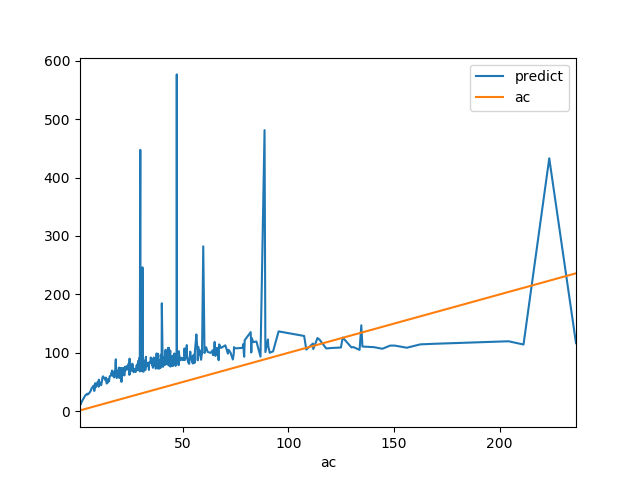

In [38]:
# ensayo 1
data_check.plot()

<IPython.core.display.Javascript object>


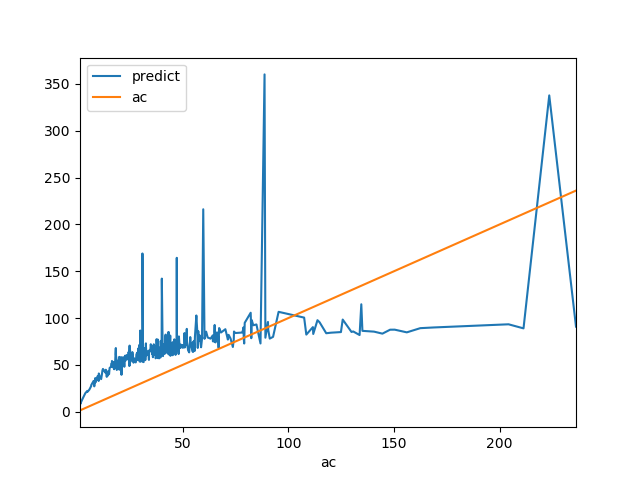

In [52]:
# ensayo 2
data_check.plot()

In [69]:
parametros300PR = pd.DataFrame(parametrosCompletosPR.ix[0:100])
parametros300PR

,Omega,Tc,Pc,Vc,Zc,Tm,Tb,Ttr,Ptr,Vliq,SolPar,ac,b,rm,del1
METHANE,0.0115,190.564,45.389,0.0986,0.286,90.694,111.660,90.694,1.154310e-01,0.037969,11.6000,2.528951,0.027157,0.392340,2.414214
ETHANE,0.0995,305.320,48.083,0.1455,0.279,90.352,184.550,90.352,1.115220e-05,0.055229,12.4000,6.128134,0.041073,0.525423,2.414214
PROPANE,0.1523,369.830,41.924,0.2000,0.276,85.470,231.110,85.470,1.662970e-09,0.075700,13.1000,10.312189,0.057060,0.603265,2.414214
n-BUTANE,0.2002,425.120,37.464,0.2550,0.274,134.860,272.650,134.860,6.647720e-06,0.096483,13.7000,15.248188,0.073399,0.672582,2.414214
n-PENTANE,0.2515,469.700,33.259,0.3130,0.270,143.420,309.220,143.420,6.774420e-07,0.116045,14.4000,20.967239,0.091349,0.745445,2.414214
n-HEXANE,0.3013,507.600,29.854,0.3710,0.266,177.830,341.880,177.830,8.899040e-06,0.131362,14.9000,27.280355,0.109979,0.814819,2.414214
n-HEPTANE,0.3495,540.200,27.042,0.4280,0.261,182.570,371.580,182.570,1.803050e-06,0.147024,15.2000,34.109839,0.129214,0.880689,2.414214
n-OCTANE,0.3996,568.700,24.574,0.4860,0.256,216.380,398.830,216.380,2.080730e-05,0.163374,15.4000,41.600631,0.149692,0.947826,2.414214
n-NONANE,0.4435,594.600,22.601,0.5440,0.252,219.660,423.970,219.660,4.249520e-06,0.179559,15.6000,49.446035,0.170173,1.005541,2.414214
n-DECANE,0.4923,617.700,20.824,0.6000,0.247,243.510,447.305,243.510,1.374750e-05,0.195827,15.7000,57.916241,0.191869,1.068477,2.414214


In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    parametros300PR[["Tc", "Pc"]], parametros300PR["ac"], 
    test_size=0.30, random_state=42
)

model = MLPRegressor(
    # ensayo 1
    max_iter=1000,
    # ensayo 2
    #hidden_layer_sizes=(100,100,100),
    learning_rate_init=0.0001,
)
model.fit(X_train, y_train)

predict = model.predict(X_test)
print("Predict: %s" % list(predict[:5]))

data_check = pd.DataFrame(predict, columns=["predict"])
data_check["ac"]=list(y_test)
data_check.set_index(["ac"], drop=False, inplace=True)
data_check.sort_values(by=["ac"], inplace=True)

Predict: [73.070314925137623, 70.254437552486181, 72.426786915187705, 78.095359431070079, 78.095359431070079]


/home/andres-python/anaconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


<IPython.core.display.Javascript object>


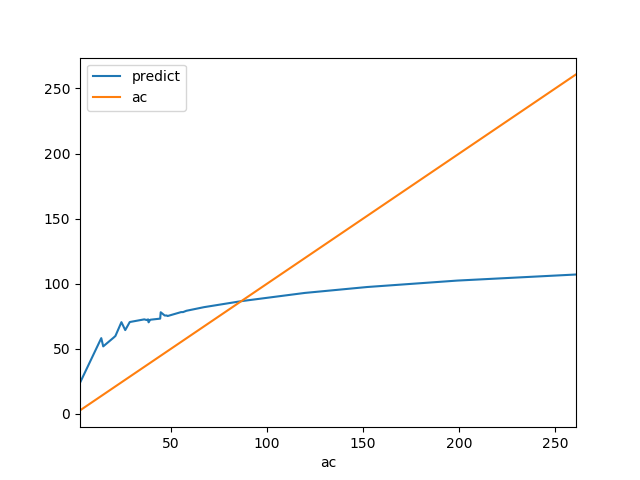

In [73]:
# ensayo 3
data_check.plot()

In [75]:
repeticionesDatosPR = [parametrosCompletosPR, parametrosCompletosPR, parametrosCompletosPR, parametrosCompletosPR,
                       parametrosCompletosPR,parametrosCompletosPR,parametrosCompletosPR,parametrosCompletosPR,
                       parametrosCompletosPR, parametrosCompletosPR, parametrosCompletosPR, parametrosCompletosPR]

parametrosRepetidos = pd.concat(repeticionesDatosPR)
parametrosRepetidos

,Omega,Tc,Pc,Vc,Zc,Tm,Tb,Ttr,Ptr,Vliq,SolPar,ac,b,rm,del1
METHANE,0.0115,190.564,45.389,0.0986,0.2860,90.694,111.660,90.694,1.154310e-01,0.037969,11.6000,2.528951,0.027157,0.392340,2.414214
ETHANE,0.0995,305.320,48.083,0.1455,0.2790,90.352,184.550,90.352,1.115220e-05,0.055229,12.4000,6.128134,0.041073,0.525423,2.414214
PROPANE,0.1523,369.830,41.924,0.2000,0.2760,85.470,231.110,85.470,1.662970e-09,0.075700,13.1000,10.312189,0.057060,0.603265,2.414214
n-BUTANE,0.2002,425.120,37.464,0.2550,0.2740,134.860,272.650,134.860,6.647720e-06,0.096483,13.7000,15.248188,0.073399,0.672582,2.414214
n-PENTANE,0.2515,469.700,33.259,0.3130,0.2700,143.420,309.220,143.420,6.774420e-07,0.116045,14.4000,20.967239,0.091349,0.745445,2.414214
n-HEXANE,0.3013,507.600,29.854,0.3710,0.2660,177.830,341.880,177.830,8.899040e-06,0.131362,14.9000,27.280355,0.109979,0.814819,2.414214
n-HEPTANE,0.3495,540.200,27.042,0.4280,0.2610,182.570,371.580,182.570,1.803050e-06,0.147024,15.2000,34.109839,0.129214,0.880689,2.414214
n-OCTANE,0.3996,568.700,24.574,0.4860,0.2560,216.380,398.830,216.380,2.080730e-05,0.163374,15.4000,41.600631,0.149692,0.947826,2.414214
n-NONANE,0.4435,594.600,22.601,0.5440,0.2520,219.660,423.970,219.660,4.249520e-06,0.179559,15.6000,49.446035,0.170173,1.005541,2.414214
n-DECANE,0.4923,617.700,20.824,0.6000,0.2470,243.510,447.305,243.510,1.374750e-05,0.195827,15.7000,57.916241,0.191869,1.068477,2.414214


In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    parametrosRepetidos[["Tc", "Pc"]], parametrosRepetidos["ac"], 
    test_size=0.30, random_state=42
)

model = MLPRegressor(
    # ensayo 1
    max_iter=1000,
    # ensayo 2
    #hidden_layer_sizes=(100,100,100),
    learning_rate_init=0.0001,
)
model.fit(X_train, y_train)

predict = model.predict(X_test)
print("Predict: %s" % list(predict[:5]))

data_check = pd.DataFrame(predict, columns=["predict"])
data_check["ac"]=list(y_test)
data_check.set_index(["ac"], drop=False, inplace=True)
data_check.sort_values(by=["ac"], inplace=True)

Predict: [21.38840039379458, 11.872047433940207, 35.968782517263286, 15.370919241174878, 16.743778246863453]


<IPython.core.display.Javascript object>


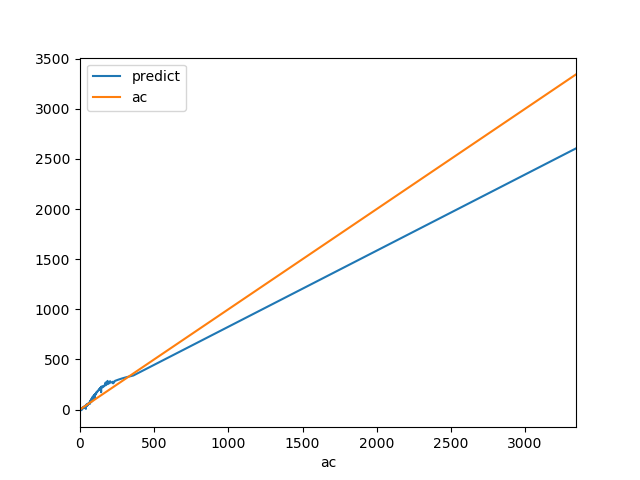

In [77]:
# ensayo 4
data_check.plot()

In [79]:
repeticionesDatosPR_2 = [parametrosCompletosPR, parametrosCompletosPR, parametrosCompletosPR, parametrosCompletosPR,
                       parametrosCompletosPR,parametrosCompletosPR,parametrosCompletosPR,parametrosCompletosPR,
                       parametrosCompletosPR, parametrosCompletosPR, parametrosCompletosPR, parametrosCompletosPR,
                        parametrosCompletosPR, parametrosCompletosPR, parametrosCompletosPR, parametrosCompletosPR,
                       parametrosCompletosPR,parametrosCompletosPR,parametrosCompletosPR,parametrosCompletosPR,
                       parametrosCompletosPR, parametrosCompletosPR, parametrosCompletosPR, parametrosCompletosPR]

parametrosRepetidos_2 = pd.concat(repeticionesDatosPR_2)
parametrosRepetidos_2

,Omega,Tc,Pc,Vc,Zc,Tm,Tb,Ttr,Ptr,Vliq,SolPar,ac,b,rm,del1
METHANE,0.0115,190.564,45.389,0.0986,0.2860,90.694,111.660,90.694,1.154310e-01,0.037969,11.6000,2.528951,0.027157,0.392340,2.414214
ETHANE,0.0995,305.320,48.083,0.1455,0.2790,90.352,184.550,90.352,1.115220e-05,0.055229,12.4000,6.128134,0.041073,0.525423,2.414214
PROPANE,0.1523,369.830,41.924,0.2000,0.2760,85.470,231.110,85.470,1.662970e-09,0.075700,13.1000,10.312189,0.057060,0.603265,2.414214
n-BUTANE,0.2002,425.120,37.464,0.2550,0.2740,134.860,272.650,134.860,6.647720e-06,0.096483,13.7000,15.248188,0.073399,0.672582,2.414214
n-PENTANE,0.2515,469.700,33.259,0.3130,0.2700,143.420,309.220,143.420,6.774420e-07,0.116045,14.4000,20.967239,0.091349,0.745445,2.414214
n-HEXANE,0.3013,507.600,29.854,0.3710,0.2660,177.830,341.880,177.830,8.899040e-06,0.131362,14.9000,27.280355,0.109979,0.814819,2.414214
n-HEPTANE,0.3495,540.200,27.042,0.4280,0.2610,182.570,371.580,182.570,1.803050e-06,0.147024,15.2000,34.109839,0.129214,0.880689,2.414214
n-OCTANE,0.3996,568.700,24.574,0.4860,0.2560,216.380,398.830,216.380,2.080730e-05,0.163374,15.4000,41.600631,0.149692,0.947826,2.414214
n-NONANE,0.4435,594.600,22.601,0.5440,0.2520,219.660,423.970,219.660,4.249520e-06,0.179559,15.6000,49.446035,0.170173,1.005541,2.414214
n-DECANE,0.4923,617.700,20.824,0.6000,0.2470,243.510,447.305,243.510,1.374750e-05,0.195827,15.7000,57.916241,0.191869,1.068477,2.414214


In [82]:

X_train, X_test, y_train, y_test = train_test_split(
    parametrosRepetidos_2[["Tc", "Pc"]], parametrosRepetidos_2["ac"], 
    test_size=0.30, random_state=42
)

model = MLPRegressor(
    # ensayo 1
    max_iter=1000,
    # ensayo 2
    #hidden_layer_sizes=(100,100,100),
    learning_rate_init=0.0001,
)
model.fit(X_train, y_train)

predict = model.predict(X_test)
print("Predict: %s" % list(predict[:5]))

data_check = pd.DataFrame(predict, columns=["predict"])
data_check["ac"]=list(y_test)
data_check.set_index(["ac"], drop=False, inplace=True)
data_check.sort_values(by=["ac"], inplace=True)

Predict: [43.614579397826738, 30.952456480089747, 40.693734468062594, 24.17367662389584, 20.152395640949333]


<IPython.core.display.Javascript object>


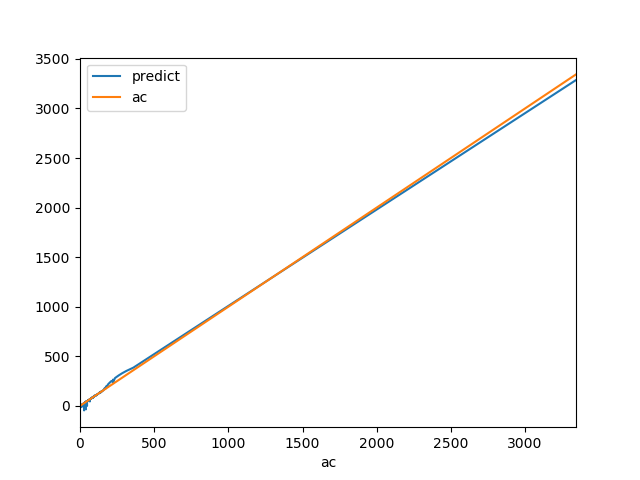

In [83]:
# ensayo 5
data_check.plot()

In [17]:
name_componets

['METHANE',
 'ETHANE',
 'PROPANE',
 'n-BUTANE',
 'n-PENTANE',
 'n-HEXANE',
 'n-HEPTANE',
 'n-OCTANE',
 'n-NONANE',
 'n-DECANE',
 'n-UNDECANE',
 'n-DODECANE',
 'n-TRIDECANE',
 'n-TETRADECANE',
 'n-PENTADECANE',
 'n-HEXADECANE',
 'n-HEPTADECANE',
 'n-OCTADECANE',
 'n-NONADECANE',
 'n-EICOSANE',
 'n-HENEICOSANE',
 'n-DOCOSANE',
 'n-TRICOSANE',
 'n-TETRACOSANE',
 'n-PENTACOSANE',
 'n-HEXACOSANE',
 'n-OCTACOSANE',
 'n-TRIACONTANE',
 'n-DOTRIACONTANE',
 'n-HEXATRIACONTANE',
 'ISOBUTANE',
 'ISOPENTANE',
 '2-METHYLPENTANE',
 '3-METHYLPENTANE',
 '2-METHYLHEXANE',
 '3-METHYLHEXANE',
 '2-METHYLHEPTANE',
 '3-METHYLHEPTANE',
 '4-METHYLHEPTANE',
 '2-METHYLOCTANE',
 '3-METHYLOCTANE',
 '4-METHYLOCTANE',
 '2-METHYLNONANE',
 '3-METHYLNONANE',
 '4-METHYLNONANE',
 '5-METHYLNONANE',
 'NEOPENTANE',
 '2,2-DIMETHYLBUTANE',
 '2,3-DIMETHYLBUTANE',
 '2,2-DIMETHYLPENTANE',
 '2,3-DIMETHYLPENTANE',
 '2,4-DIMETHYLPENTANE',
 '3,3-DIMETHYLPENTANE',
 '2,2-DIMETHYLHEXANE',
 '2,3-DIMETHYLHEXANE',
 '2,4-DIMETHYLHEXANE',
 

In [19]:
from rdkit import Chem
from rdkit.Chem import Draw
from pubchempy import get_cids, get_compounds
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
moleculaSmiles = get_compounds(molecula, 'name')[0].canonical_smiles
moleculaSmiles

In [22]:
name_componets[:20]

['METHANE',
 'ETHANE',
 'PROPANE',
 'n-BUTANE',
 'n-PENTANE',
 'n-HEXANE',
 'n-HEPTANE',
 'n-OCTANE',
 'n-NONANE',
 'n-DECANE',
 'n-UNDECANE',
 'n-DODECANE',
 'n-TRIDECANE',
 'n-TETRADECANE',
 'n-PENTADECANE',
 'n-HEXADECANE',
 'n-HEPTADECANE',
 'n-OCTADECANE',
 'n-NONADECANE',
 'n-EICOSANE']

In [59]:
#moleculaSmiles = np.chararray(10)
#moleculaSmiles = []

def names_to_smiles(name_componet):
    
    ##for i, name in enumerate(name_componets):
        # query for cid first in order to avoid timeouterror
    ##    moleculaSmiles[i] = get_compounds(name, 'name')[0].canonical_smiles
    ##    print(moleculaSmiles)
        #cid = get_cids(compound, 'name')[0]
        #smiles = get_compounds(cid)[0].canonical_smiles
    cid = get_cids(name_componet, 'name')[0]
    moleculaSmiles = get_compounds(cid)[0].canonical_smiles
        
    #moleculaSmiles = get_compounds(name, 'name')[0].canonical_smiles

    return moleculaSmiles

In [87]:
name_componets[40:43] #ensayo 2
name_componets[140:143] #ensayo 3
name_componets[340:345] #ensayo 4

['1,1,2,2-TETRAPHENYLETHANE',
 'd-LIMONENE',
 'alpha-PHELLANDRENE',
 'beta-PHELLANDRENE',
 'alpha-TERPINENE']

In [84]:
#dppr_smiles = names_to_smiles(name_componets[:3])


dppr_smiles = [names_to_smiles(name) for name in name_componets[340:345]]

#smiles_map = {}
#for i in drugs:
#    smiles_map[i] = compound_to_smiles(i)


In [85]:
dppr_smiles

['C1=CC=C(C=C1)C(C2=CC=CC=C2)C(C3=CC=CC=C3)C4=CC=CC=C4',
 'CC1=CCC(CC1)C(=C)C',
 'CC1=CCC(C=C1)C(C)C',
 'CC(C)C1CCC(=C)C=C1',
 'CC1=CC=C(CC1)C(C)C']

In [81]:
#molecula_D = Chem.MolFromSmiles(dppr_smiles)

#Draw.MolToMPL(molecula_D, size=(50, 50))

In [67]:
def graficarMolecula(smiles):
    
    molecula_D = Chem.MolFromSmiles(smiles)
    Draw.MolToMPL(molecula_D, size=(50, 50))

[None, None, None]

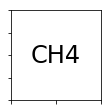

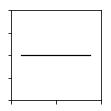

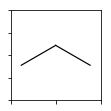

In [68]:
# ensayo 1

[graficarMolecula(smiles) for smiles in dppr_smiles]

[None, None]

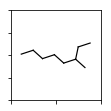

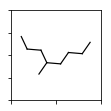

In [77]:
# ensayo 2

[graficarMolecula(smiles) for smiles in dppr_smiles]

[None, None]

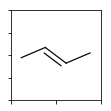

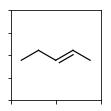

In [82]:
# ensayo 3

[graficarMolecula(smiles) for smiles in dppr_smiles]

[None, None, None, None, None]

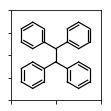

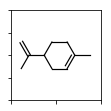

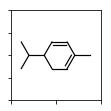

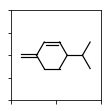

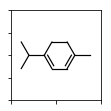

In [86]:
# ensayo 4

[graficarMolecula(smiles) for smiles in dppr_smiles]

De esta forma se observa el calculo simple de los parámetros para la sustancia pura 3-METHYLHEPTANE_RKPR

A continuación se realiza el mismo tipo de calculo pero tomando una serie de 9 sustancias puras, que se pueden extender facilmente a n sustancias, para obtener sus parámetros de nuevo con la ecuación de estado RKPR.

In [3]:
properties_data = pt.Data_parse()

components = ["ISOBUTANE", "CARBON DIOXIDE", 'METHANE', "ETHANE", "3-METHYLHEPTANE", "n-PENTACOSANE",
              "NAPHTHALENE", "m-ETHYLTOLUENE", "2-METHYL-1-HEXENE"]

NMODEL = "RKPR"
ICALC = "constants_eps"
component_eos_list = np.zeros((len(components),4))

for index, component in enumerate(components):
    
    properties_component = properties_data.selec_component(component)
    pt.print_properties_component(component, properties_component)
    dinputs = np.array([properties_component[1]['Tc'], properties_component[1]['Pc'],
                        properties_component[1]['Omega'], properties_component[1]['Vc']])
    
    component_eos = pt.models_eos_cal(NMODEL, ICALC, dinputs)
    component_eos_list[index] = component_eos 
    
components_table = pd.DataFrame(component_eos_list, index=components, columns=['ac', 'b', 'rm', 'del1'])

print(components_table)



Component = ISOBUTANE
Acentric_factor = 0.18080000000000002
Critical_Temperature = 408.14 K
Critical_Pressure = 36.003 Bar
Critical_Volume = 0.2627 cm3/mol
Compressibility_factor_Z = 0.28200000000000003


del1ini = 3.9722378008963446
Zc = 0.27871152548257544
The NMODEL is eos_RKPR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = CARBON DIOXIDE
Acentric_factor = 0.22360000000000002
Critical_Temperature = 304.21 K
Critical_Pressure = 72.865 Bar
Critical_Volume = 0.094 cm3/mol
Compressibility_factor_Z = 0.274


del1ini = 4.462908059336361
Zc = 0.2707937660977233
The NMODEL is eos_RKPR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = METHANE
Acentric_factor = 0.0115
Critical_Temperature = 190.564 K
Critical_Pressure = 45.389 Bar
Critical_Volume = 0.09860000000000001 cm3/mol
Compressibility_factor_Z = 0.28600000000000003


del1ini = 3.7519407434981633
Zc = 0.2824567739174239
The NMODEL is eos_RKPR and method ICALC is constants_eps
params = [ac

/home/andres-python/Documentos/proyectos/pyther/pyther/cubic_parameters_1.py:86: RuntimeWarning: invalid value encountered in log
  AT = F - np.log(Volume) + Volume * P_sur / (T * RGAS)


The NMODEL is eos_RKPR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = NAPHTHALENE
Acentric_factor = 0.3022
Critical_Temperature = 748.35 K
Critical_Pressure = 39.98 Bar
Critical_Volume = 0.41300000000000003 cm3/mol
Compressibility_factor_Z = 0.269


del1ini = 4.8204311891035925
Zc = 0.2653709654843225
The NMODEL is eos_RKPR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = m-ETHYLTOLUENE
Acentric_factor = 0.3226
Critical_Temperature = 637.15 K
Critical_Pressure = 28.029 Bar
Critical_Volume = 0.49 cm3/mol
Compressibility_factor_Z = 0.263


del1ini = 5.246526144851435
Zc = 0.2592551086535563
The NMODEL is eos_RKPR and method ICALC is constants_eps
params = [ac, b, rm, del1]
Component = 2-METHYL-1-HEXENE
Acentric_factor = 0.3094
Critical_Temperature = 538 K
Critical_Pressure = 28.325 Bar
Critical_Volume = 0.398 cm3/mol
Compressibility_factor_Z = 0.255


del1ini = 5.784189965441039
Zc = 0.2520206003977051
The NMODEL is eos_RKPR and method IC

Como se observa, los resultados obtenidos son organizados en un DataFrame permitiendo agilizar la manipulación de los datos de una serie de sustancias puras.

In [8]:
components_table

,ac,b,rm,del1
ISOBUTANE,15.743219,0.064343,2.205509,4.000470
CARBON DIOXIDE,4.409808,0.022801,2.280728,4.492210
METHANE,2.696405,0.024259,1.282178,3.777713
ETHANE,6.649597,0.035503,1.673541,4.190762
3-METHYLHEPTANE,46.430579,0.109351,2.586092,6.043125
n-PENTACOSANE,289.947431,0.320522,4.581358,10.628260
NAPHTHALENE,49.312554,0.099495,2.591582,4.847168
m-ETHYLTOLUENE,51.786960,0.117115,2.565531,5.267361
2-METHYL-1-HEXENE,37.214555,0.094214,2.338038,5.794610


En el siguiente ejemplo se utiliza la ecuación RKPR pero esta vez con la especificación de la temperatura y densidad de líquido saturado para el CARBON DIOXIDE y de esta forma encontrar el valor del parámetro *delta* que verifica la especificación realizada para la densidad de líquido saturado. 

In [29]:
properties_data = pt.Data_parse()

dppr_file = "PureFull.xls"
component = "CARBON DIOXIDE"

NMODEL = "RKPR"
ICALC = "density"

properties_component = properties_data.selec_component(dppr_file, component)
pt.print_properties_component(component, properties_component)
#dinputs = np.array([properties_component[1]['Tc'], properties_component[1]['Pc'],
#                    properties_component[1]['Omega'], properties_component[1]['Vc']])

T_especific = 270.0
RHOLSat_esp = 21.4626
# valor initial of delta_1
delta_1 = 1.5

dinputs = np.array([properties_component[1]['Tc'], properties_component[1]['Pc'],
                    properties_component[1]['Omega'], delta_1, T_especific, RHOLSat_esp])


component_eos = pt.models_eos_cal(NMODEL, ICALC, dinputs)

print(component_eos)

Component = CARBON DIOXIDE
Acentric_factor = 0.22360000000000002
Critical_Temperature = 304.21 K
Critical_Pressure = 72.865 Bar
Critical_Volume = 0.094 cm3/mol
Compressibility_factor_Z = 0.274
The NMODEL is eos_RKPR and method ICALC is density
The parameter delta1(rho,T) = [ 2.65756708]
[ 2.65756708]


## Bibliografía

1. Martín Cismondi, Jørgen Mollerup. Development and application of a three-parameter RK–PR equation of state. Fluid Phase Equilibria. Volume 232, 25 May 2005, Pages 74-89